Let's begin with the code...

Downloading the Cats VS Dogs Dataset in a temperory zip folder.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-06 12:05:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  95.7MB/s    in 0.7s    

2020-06-06 12:05:05 (95.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Importing all the libraries required for the model to train.

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop 

Unzipping the Zipped Dataset. The Dataset contains two sub-folders namely:
*  train
*  validation

Inside these both sub-folders, there are two another sub-folders named cats and dogs.

The train folder contains images of cats and dogs for training of the model.

The validation folder contains images of cats and dogs for validating the model.


In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Including 4 Convulotion layers with 32, 64, 128, 256 Convulotions respectively.

In [0]:
model = keras.models.Sequential([ keras.layers.Conv2D(32,(3,3), input_shape=(150,150,3), activation='relu'),
                                  keras.layers.MaxPool2D(2,2),
                                  keras.layers.Conv2D(64,(3,3), activation='relu'),
                                  keras.layers.MaxPool2D(2,2),
                                  keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  keras.layers.MaxPool2D(2,2),
                                  keras.layers.Conv2D(256,(3,3),activation='relu'),
                                  keras.layers.MaxPool2D(2,2),
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(128 , activation='relu'),
                                  keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.compile(optimizer = RMSprop(lr=1e-4) , loss = 'binary_crossentropy' , metrics = ['accuracy'])

Keras's ImageDataGenerator helps in augmentation of the data.

In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255 , rotation_range=0.2 , horizontal_flip=True, shear_range=0.2,
                                   width_shift_range= 0.2, height_shift_range= 0.2, zoom_range=0.2, fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1/255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode='binary',
    target_size = (150,150)
)

test_gen = test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode='binary',
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=100, validation_data=test_gen, validation_steps=50 )

Epoch 1/100
100/100 [==============================] - 105s 1s/step - loss: 0.5280 - accuracy: 0.7480 - val_loss: 0.5111 - val_accuracy: 0.7440
Epoch 2/100
100/100 [==============================] - 105s 1s/step - loss: 0.5086 - accuracy: 0.7560 - val_loss: 0.5096 - val_accuracy: 0.7560
Epoch 3/100
100/100 [==============================] - 104s 1s/step - loss: 0.4986 - accuracy: 0.7645 - val_loss: 0.4904 - val_accuracy: 0.7680
Epoch 4/100
100/100 [==============================] - 104s 1s/step - loss: 0.4860 - accuracy: 0.7605 - val_loss: 0.4988 - val_accuracy: 0.7640
Epoch 5/100
100/100 [==============================] - 104s 1s/step - loss: 0.4869 - accuracy: 0.7630 - val_loss: 0.4861 - val_accuracy: 0.7650
Epoch 6/100
100/100 [==============================] - 104s 1s/step - loss: 0.4765 - accuracy: 0.7720 - val_loss: 0.4758 - val_accuracy: 0.7710
Epoch 7/100
100/100 [==============================] - 104s 1s/step - loss: 0.4679 - accuracy: 0.7860 - val_loss: 0.4882 - val_accuracy:

Plotting both Accuracy and Validation Accuracy and Loss and Validation Loss.

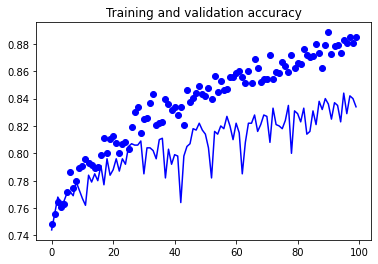

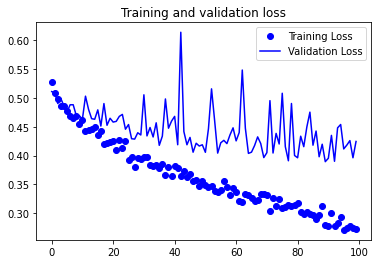

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This code block helps in uploaing the images from the localhost for testing.

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if classes>[0.5]:
    print(fn , "is a dog")
  else:
    print(fn , "is a cat")
 

Saving sd.jpg to sd.jpg
sd.jpg
[[1.]]
sd.jpg is a dog
